In [344]:
import networkx as nx
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pygraphviz # Needs to be imported for some networkx functions
from enum import Enum
import math
import pandas as pd
import numpy as np
import copy
import matplotlib.colors as mcolors

In [345]:
class MicroAttackStageConfidentiality(Enum):
    INIT = 0.1

    # Low Severity
    TARGET_IDEN = 0.1
    SURFING = 0.1
    SOCIAL_ENGINEERING = 0.25
    HOST_DISC = 0.25
    SERVICE_DISC = 0.25
    VULN_DISC = 0.25
    INFO_DISC = 0.25

    # Medium Severity
    USER_PRIV_ESC = 0.5
    ROOT_PRIV_ESC = 0.5
    NETWORK_SNIFFING = 0.5
    BRUTE_FORCE_CREDS = 0.5
    ACCT_MANIP = 0.5
    TRUSTED_ORG_EXP = 0.5
    PUBLIC_APP_EXP = 0.5
    REMOTE_SERVICE_EXP = 0.5
    SPEARPHISHING = 0.5
    SERVICE_SPECIFIC = 0.5
    DEFENSE_EVASION = 0.1
    COMMAND_AND_CONTROL = 0.5
    LATERAL_MOVEMENT = 0.5
    ARBITRARY_CODE_EXE = 0.5
    PRIV_ESC = 0.5

    # High Severity
    END_POINT_DOS = 0.1
    NETWORK_DOS = 0.1
    SERVICE_STOP = 0.1
    RESOURCE_HIJACKING = 0.1
    DATA_DESTRUCTION = 0.1
    CONTENT_WIPE = 0.1
    DATA_ENCRYPTION = 0.1
    DEFACEMENT = 1
    DATA_MANIPULATION = 0.1
    DATA_EXFILTRATION = 1
    DATA_DELIVERY = 0.1
    PHISHING = 1


class MicroAttackStageAvailability(Enum):
    INIT = 0.1

    # Low Severity
    TARGET_IDEN = 0.1
    SURFING = 0.1
    SOCIAL_ENGINEERING = 0.1
    HOST_DISC = 0.1
    SERVICE_DISC = 0.1
    VULN_DISC = 0.1
    INFO_DISC = 0.1

    # Medium Severity
    USER_PRIV_ESC = 0.5
    ROOT_PRIV_ESC = 0.5
    NETWORK_SNIFFING = 0.1
    BRUTE_FORCE_CREDS = 0.5
    ACCT_MANIP = 0.5
    TRUSTED_ORG_EXP = 0.1
    PUBLIC_APP_EXP = 0.5
    REMOTE_SERVICE_EXP = 0.1
    SPEARPHISHING = 0.1
    SERVICE_SPECIFIC = 0.5
    DEFENSE_EVASION = 0.1
    COMMAND_AND_CONTROL = 0.1
    LATERAL_MOVEMENT = 0.1
    ARBITRARY_CODE_EXE = 0.1
    PRIV_ESC = 0.1

    # High Severity
    END_POINT_DOS = 1
    NETWORK_DOS = 1
    SERVICE_STOP = 1
    RESOURCE_HIJACKING = 1
    DATA_DESTRUCTION = 1
    CONTENT_WIPE = 1
    DATA_ENCRYPTION = 1
    DEFACEMENT = 0.1
    DATA_MANIPULATION = 0.1
    DATA_EXFILTRATION = 0.1
    DATA_DELIVERY = 0.1
    PHISHING = 0.1

    NON_MALICIOUS = 0.1


class MicroAttackStageIntegrity(Enum):
    INIT = 0.1

    # Low Severity
    TARGET_IDEN = 0.1
    SURFING = 0.1
    SOCIAL_ENGINEERING = 0.1
    HOST_DISC = 0.1
    SERVICE_DISC = 0.1
    VULN_DISC = 0.25
    INFO_DISC = 0.1

    # Medium Severity
    USER_PRIV_ESC = 0.1
    ROOT_PRIV_ESC = 0.5
    NETWORK_SNIFFING = 0.1
    BRUTE_FORCE_CREDS = 0.1
    ACCT_MANIP = 0.5
    TRUSTED_ORG_EXP = 0.5
    PUBLIC_APP_EXP = 0.5
    REMOTE_SERVICE_EXP = 0.5
    SPEARPHISHING = 0.1
    SERVICE_SPECIFIC = 0.5
    DEFENSE_EVASION = 0.1
    COMMAND_AND_CONTROL = 0.5
    LATERAL_MOVEMENT = 0.5
    ARBITRARY_CODE_EXE = 0.5
    PRIV_ESC = 0.1

    # High Severity
    END_POINT_DOS = 0.1
    NETWORK_DOS = 0.1
    SERVICE_STOP = 0.1
    RESOURCE_HIJACKING = 0.1
    DATA_DESTRUCTION = 1
    CONTENT_WIPE = 1
    DATA_ENCRYPTION = 1
    DEFACEMENT = 1
    DATA_MANIPULATION = 1
    DATA_EXFILTRATION = 0.1
    DATA_DELIVERY = 1
    PHISHING = 0.1

    NON_MALICIOUS = 0.1


# AIF Mapping
verbose_micro = {'INIT': 'INITILIZE',
'TARGET_IDEN': 'TARGET IDENTIFICATION',
'SURFING': 'SURFING',
'SOCIAL_ENGINEERING': 'SOCIAL ENGINEERING',
'HOST_DISC': 'HOST DISCOVERY',
'SERVICE_DISC': 'SERVICE DISCOVERY',
'VULN_DISC': 'VULNERABILTY DISCOVERY',
'INFO_DISC': 'INFO DISCOVERY',
'USER_PRIV_ESC': 'USER PRIVILEGE ESCALATION',
'ROOT_PRIV_ESC': 'ROOT PRIVILEGE ESCALATION',
'NETWORK_SNIFFING': 'NETWORK SNIFFING',
'BRUTE_FORCE_CREDS': 'BRUTE FORCE CREDENTIALS',
'ACCT_MANIP': 'ACCOUNT MANIPULATION',
'TRUSTED_ORG_EXP': 'TRUSTED ORG. EXPLOIT',
'PUBLIC_APP_EXP': 'PUBLIC APP EXPLOIT',
'REMOTE_SERVICE_EXP': 'REMOTE SERVICE EXPLOIT',
'SPEARPHISHING': 'SPEAR PHISHING',
'SERVICE_SPECIFIC': 'SERVICE SPECIFIC',
'DEFENSE_EVASION': 'DEFENSE EVASION',
'COMMAND_AND_CONTROL': 'COMMAND AND CONTROL',
'LATERAL_MOVEMENT': 'LATERAL MOVEMENT',
'ARBITRARY_CODE_EXE': 'ARBITRARY CODE EXECUTION',
'PRIV_ESC': 'PRIVILEGE ESCALATION',
'END_POINT_DOS': 'END POINT DoS',
'NETWORK_DOS': 'NETWORK DoS',
'SERVICE_STOP': 'SERVICE STOP',
'RESOURCE_HIJACKING': 'RESOURCE HIJACKING',
'DATA_DESTRUCTION': 'DATA DESTRUCTION',
'CONTENT_WIPE': 'CONTENT WIPE',
'DATA_ENCRYPTION': 'DATA ENCRYPTION',
'DEFACEMENT': 'DEFACEMENT',
'DATA_MANIPULATION': 'DATA MANIPULATION',
'DATA_EXFILTRATION': 'DATA EXFILTRATION',
'DATA_DELIVERY': 'DATA DELIVERY',
'PHISHING': 'PHISHING',
'NON_MALICIOUS': 'NOT MALICIOUS'}

inverted_mapping = {v: k for k,v in verbose_micro.items()}

In [346]:
def print_sorted_dic(dic):
    """
    Print the given dictionary (key, score) sorted on the score.
    """
    arr = sorted(dic.items(), key= lambda x : -x[1])
    for i,el in enumerate(arr):
        print(i+1,el)

def get_urgency_ais(urgency, level="HIGH"):
    res = []

    if level == "HIGH":
        for aif,urgence in urgency.items():
            if urgence > .5:
                res.append(aif)
        return res
    elif level == "MED":
        for aif,urgence in urgency.items():
            if .5 >= urgence > .25:
                res.append(aif)
        return res

    elif level == "LOW":
        for aif,urgence in urgency.items():
            if urgence <= .25:
                res.append(aif)

        return res
    else:
        raise Exception("Wrong level provided")

def get_attack_stage(node):
    index = 1 if "Victim" in node else 0
    
    name = node.split("\n")[index].replace('"',"").replace("\r","")
    name = inverted_mapping[name]
    return name


def make_heatmap(urgency, graph_name, metric_name, savefig=False):
    data_dict = urgency

    # Convert dictionary to DataFrame
    data = pd.DataFrame.from_dict(data_dict, orient='index', columns=['Urgency'])
    data.reset_index(inplace=True)
    data.columns = ['Attack Stage', 'Urgency Score']
    data.set_index("Attack Stage", inplace=True)
    data = data.sort_values("Urgency Score", ascending=False)

    plt.figure()
    sns.heatmap(data, cmap='YlOrRd', annot=True, fmt="g", vmin=0, vmax=1, cbar_kws={'label': 'Low (<=0.25) to High (>0.5) urgency'})

    # Customize the plot
    plt.ylabel('Attack Stage')
    plt.title('Attack Stage Urgency Heatmap ' + graph_name + ' for ' + str(metric_name))
    # plt.title("Percentage: " +
    # Display the heatmap
    plt.tight_layout()
    if savefig == True:
        plt.savefig("./figs/heatmap" + graph_name + "_" + str(metric_name) + ".png")
    plt.show()
    
def get_as_occurences(graph):
    aif_count = dict()

    # Count AS occurences
    for node in graph.nodes:
        # Get attack stage and count
        name = get_attack_stage(node)
        aif_count[name] = aif_count.get(name, 0) + 1
    
    return aif_count

In [337]:
def get_pica_nodes(graph, w1, w2, w3):
    urgence = dict()
    max_in = 0

#     aif_count = dict()

#     for node in graph.nodes:
#         if "Victim" in node:
#             continue

#         name = get_attack_stage(node)
#         aif_count[name] = aif_count.get(name, 0) + 1

    for node in graph.nodes:
        if "Victim" in node: continue
        max_in = max(max_in, len(graph.in_edges(node)))

        non_verbose = get_attack_stage(node)

        urgence[node] = get_cia(non_verbose, w1, w2, w3)

    # Multiply by in-degree factor
    for node in graph.nodes:
        if "Victim" in node: continue
            
        if len(graph.in_edges(node)) == 0:
            urgence[node] = 1/max_in * urgence[node]
        else:
            urgence[node] = len(graph.in_edges(node))/max_in * urgence[node]

    print_sorted_dic(urgence)

#     # Normalise to [0,1]
    max_urgence = max(urgence.values())
    min_urgence = min(urgence.values())
    for node in graph.nodes:
        if "Victim" in node: continue
        urgence[node] = (urgence[node]-min_urgence)/(max_urgence-min_urgence)
#     print_sorted_dic(urgence)
    return urgence

def get_cia(ais, w1, w2, w3):
    confidentiality = MicroAttackStageConfidentiality.__getitem__(ais).value
    availability = MicroAttackStageAvailability.__getitem__(ais).value
    integrity = MicroAttackStageIntegrity.__getitem__(ais).value

#     if "DELIVERY" in ais:
#         print(confidentiality)
#         print(availability)
#         print(integrity)
    
    return (w1 * confidentiality + w2 * integrity + w3 * availability)/(w1+w2+w3)

def get_pica(graph, w1, w2, w3, percentage):
    return node_to_aif(get_pica_nodes(graph, w1, w2, w3), percentage)

def node_to_aif(urgence, percentage):
    aif_urgence = get_ais_nodes(urgence)

#     # For AS, create a list of urgencies from the belonging nodes
#     for node, urgency in urgence.items():
#         name = get_attack_stage(node)

#         if aif_urgence.get(name) is None:
#             aif_urgence[name] = [urgency]
#         else:
#             aif_urgence.get(name).append(urgency)

    aif_avg_urg = dict()

    # For each AS, take the average of the highest X percentage
    for aif,nodes in aif_urgence.items():
        if nodes is None:
            continue
        sorted_dict = sorted(nodes, reverse=True)

        # Determine the number of items to include in the top X% based on the dictionary size
        top_25_percent_count = math.ceil(len(sorted_dict) * percentage)

        top_25_percent_dict = sorted_dict[:top_25_percent_count]
        #
        aif_avg_urg[aif] = sum(top_25_percent_dict)/len(top_25_percent_dict)
    
        # Normalise to [0,1]
#     max_urgence = max(aif_avg_urg.values())
#     min_urgence = min(aif_avg_urg.values())
#     for aif,urgence in aif_avg_urg.items():
#         if "Victim" in node: continue
#         aif_avg_urg[aif] = (aif_avg_urg[aif]-min_urgence)/(max_urgence-min_urgence)
#     print_sorted_dic(urgence)
    
    return aif_avg_urg

def get_ais_nodes(node_urgency):
    aif_urgency = dict()
    
    for node, urgency in node_urgency.items():
        name = get_attack_stage(node)

        if aif_urgency.get(name) is None:
            aif_urgency[name] = [urgency]
        else:
            aif_urgency.get(name).append(urgency)
    
    return aif_urgency

def execute_pica_percentages(graph, percentages):
    urgencies = []

    for percentage in percentages:
        urgencies.append(get_pica(graph, 1, 1, 1, percentage))

    return urgencies

In [338]:
gr_2018 = nx.nx_agraph.read_dot("./2018AGs/combined/combined-2018.dot")
gr_2017 = nx.nx_agraph.read_dot("./2017AGs/combined/combined-2017.dot")
linear = nx.nx_agraph.read_dot(r"C:\Users\senne\Documents\University\TU Delft CSE\Y3\Q4\Research Project\SAGE\2018AGs\2018.txt-attack-graph-for-victim-10.0.0.23-DATADELIVERYunknown.dot")

In [339]:
final = gr_2018

In [340]:
# weights = [[1,1,1], [3,1,1], [1,3,1], [1,1,3], [3,3,1], [3,1,3], [1,3,3]]

weights = [[1,1,1], [2,1,1], [1,2,1], [1,1,2], [2,2,1], [2,1,2], [1,2,2]]
# weights = [[1,1,1], [4,1,1], [1,4,1], [1,1,4], [4,4,1], [4,1,4], [1,4,4]]
# weights = [[1,1,1], [400,1,1], [1,400,1], [1,1,400], [400,400,1], [400,1,400], [1,400,400]]


In [341]:
# Calculate PICA AIS urgency per percentage
urgencies = []
for weight in weights:
    urgencies.append(get_pica(final, weight[0], weight[1], weight[2], 0.15))
    print("AAAAAA")

1 ('DATA MANIPULATION\nhttp | ID: 17', 0.21621621621621628)
2 ('DATA EXFILTRATION\nunknown | ID: 31', 0.19459459459459463)
3 ('NETWORK DoS\nhttp | ID: 5', 0.18378378378378377)
4 ('ACCOUNT MANIPULATION\nhttp | ID: 373', 0.17567567567567569)
5 ('ROOT PRIVILEGE ESCALATION\nhttp | ID: 133', 0.17567567567567569)
6 ('DATA DELIVERY\nhttp | ID: 19', 0.172972972972973)
7 ('DATA EXFILTRATION\nhttp | ID: 15', 0.172972972972973)
8 ('RESOURCE HIJACKING\nhttp | ID: 145', 0.15135135135135136)
9 ('INFO DISCOVERY\nhttp', 0.15)
10 ('ROOT PRIVILEGE ESCALATION\nhttp | ID: 141', 0.14864864864864866)
11 ('VULNERABILTY DISCOVERY\nmysql', 0.13513513513513511)
12 ('ARBITRARY CODE EXECUTION\nhttp | ID: 353', 0.12882882882882885)
13 ('ARBITRARY CODE EXECUTION\nhttp | ID: 18', 0.08918918918918921)
14 ('INFO DISCOVERY\nunknown', 0.08513513513513513)
15 ('VULNERABILTY DISCOVERY\nhttp', 0.08108108108108109)
16 ('SERVICE DISCOVERY\nunknown', 0.08108108108108109)
17 ('SURFING\nhttp', 0.05945945945945948)
18 ('DATA EXF

In [342]:
# Print number of high/med/low urgency ais for PICA
for weight, urgency in zip(weights,urgencies):
    print("Weights", str(weight))
    for val in ["HIGH", "MED", "LOW"]:
        print(val)
        print(len(get_urgency_ais(urgency, val)), get_urgency_ais(urgency, val))
    print()

Weights [1, 1, 1]
HIGH
5 ['DATA_MANIPULATION', 'INFO_DISC', 'DATA_EXFILTRATION', 'NETWORK_DOS', 'ROOT_PRIV_ESC']
MED
5 ['DATA_DELIVERY', 'VULN_DISC', 'ARBITRARY_CODE_EXE', 'ACCT_MANIP', 'RESOURCE_HIJACKING']
LOW
10 ['SERVICE_DISC', 'HOST_DISC', 'REMOTE_SERVICE_EXP', 'SURFING', 'COMMAND_AND_CONTROL', 'BRUTE_FORCE_CREDS', 'USER_PRIV_ESC', 'DATA_DESTRUCTION', 'PUBLIC_APP_EXP', 'TRUSTED_ORG_EXP']

Weights [2, 1, 1]
HIGH
3 ['INFO_DISC', 'DATA_EXFILTRATION', 'NETWORK_DOS']
MED
7 ['DATA_DELIVERY', 'DATA_MANIPULATION', 'VULN_DISC', 'ARBITRARY_CODE_EXE', 'ROOT_PRIV_ESC', 'ACCT_MANIP', 'RESOURCE_HIJACKING']
LOW
10 ['SERVICE_DISC', 'HOST_DISC', 'REMOTE_SERVICE_EXP', 'SURFING', 'COMMAND_AND_CONTROL', 'BRUTE_FORCE_CREDS', 'USER_PRIV_ESC', 'DATA_DESTRUCTION', 'PUBLIC_APP_EXP', 'TRUSTED_ORG_EXP']

Weights [1, 2, 1]
HIGH
1 ['DATA_MANIPULATION']
MED
9 ['DATA_DELIVERY', 'VULN_DISC', 'INFO_DISC', 'ARBITRARY_CODE_EXE', 'DATA_EXFILTRATION', 'NETWORK_DOS', 'ROOT_PRIV_ESC', 'ACCT_MANIP', 'RESOURCE_HIJACKING'

<Figure size 432x288 with 0 Axes>

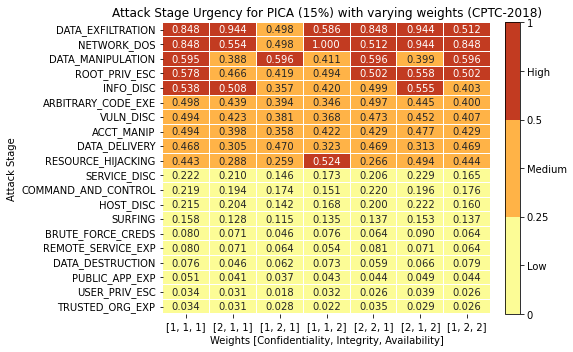

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [343]:
plt.figure()
plt.figure(figsize=(8, 5))

df = pd.DataFrame(urgencies)

df = df.set_index(pd.Series([str(weight) for weight in weights]))
df.index.name = "Weights"


sorted_columns = df.loc['[1, 1, 1]'].sort_values(ascending=False).index
df = df[sorted_columns]

df = df.transpose()


colors = [(0.99, 0.99, 0.59), (1.0, 0.7, 0.28), (0.76, 0.23, 0.13)]
cmap = mcolors.ListedColormap(colors)

# Define the color range and categories
color_range = [0, 0.25, 0.5, 1]
bounds = [0, 0.25, 0.5, 1] 
norm = mcolors.BoundaryNorm(bounds, cmap.N)



ax = sns.heatmap(df, cmap=cmap, annot=True, linewidths=0.05, linecolor='white', fmt='.3f', vmin=0, vmax=1, annot_kws={"size": 10}, norm=norm, cbar=False)
cbar = plt.colorbar(ax.collections[0], ticks=[0,0.125,0.25, 0.375,0.5,0.75,1], boundaries=bounds, fraction=0.046, pad=0.04)
cbar.set_ticklabels(["0", "Low", '0.25', "Medium", '0.5', "High", '1'])
# ax = sns.heatmap(df, annot=True, cmap="YlGnBu", linewidths=0.5, linecolor='white', fmt='.1f', annot_kws={"size": 10})

# Rotate the y-axis tick labels horizontally
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
# ax.xaxis.tick_top()
# ax.xaxis.set_label_position('top')
ax.set_ylabel("Attack Stage")
ax.set_xlabel("Weights [Confidentiality, Integrity, Availability]")
plt.title('Attack Stage Urgency for PICA (15%) with varying weights (CPTC-2018)')
plt.tight_layout()
plt.savefig("./figs/rq3/heatmap_cia_2018_node.pdf")
plt.show()  # Display the plot
plt.figure()

In [317]:
for weight, urgency in zip(weights,urgencies):
    print("Weights", str(weight))
    print(str(len(get_urgency_ais(urgency, "HIGH"))) + " " + str(len(get_urgency_ais(urgency, "MED"))) + " " + str(len(get_urgency_ais(urgency, "LOW"))))
    print()

Weights [1, 1, 1]
4 8 7

Weights [2, 1, 1]
4 7 8

Weights [1, 2, 1]
7 5 7

Weights [1, 1, 2]
1 9 9

Weights [2, 2, 1]
5 7 7

Weights [2, 1, 2]
4 7 8

Weights [1, 2, 2]
4 8 7



In [293]:
print(str([1,1,1]))
bset1 = set(get_urgency_ais(urgencies[0], "HIGH"))
bset2 = set(get_urgency_ais(urgencies[0], "MED"))
bset3 = set(get_urgency_ais(urgencies[0], "LOW"))

print(str(bset1))
print(str(bset2))
print(str(bset3))
print()
for weight, urgency in zip(weights[1::], urgencies[1::]):
    print(weight)
    
    set1 = set(get_urgency_ais(urgency, "HIGH"))
    set2 = set(get_urgency_ais(urgency, "MED"))
    set3 = set(get_urgency_ais(urgency, "LOW"))
    
    print(str(set1))
    print(str(set2))
    print(str(set3))
    
#     print(list(set1 - bset1), list(bset1 - set1))
#     print(list(set2 - bset2), list(bset2 - set2))
#     print(list(set3 - bset3), list(bset3 - set3))
    print()

[1, 1, 1]
{'NETWORK_DOS', 'ARBITRARY_CODE_EXE', 'DATA_EXFILTRATION', 'VULN_DISC'}
{'HOST_DISC', 'COMMAND_AND_CONTROL', 'SERVICE_DISC', 'ACCT_MANIP', 'SURFING', 'DATA_DELIVERY', 'REMOTE_SERVICE_EXP', 'INFO_DISC'}
{'ROOT_PRIV_ESC', 'DEFENSE_EVASION', 'USER_PRIV_ESC', 'DATA_MANIPULATION', 'PUBLIC_APP_EXP', 'PRIV_ESC', 'BRUTE_FORCE_CREDS'}

[4, 1, 1]
{'DATA_EXFILTRATION'}
{'HOST_DISC', 'COMMAND_AND_CONTROL', 'ARBITRARY_CODE_EXE', 'SERVICE_DISC', 'NETWORK_DOS', 'VULN_DISC', 'INFO_DISC'}
{'ROOT_PRIV_ESC', 'DEFENSE_EVASION', 'DATA_MANIPULATION', 'PUBLIC_APP_EXP', 'ACCT_MANIP', 'SURFING', 'PRIV_ESC', 'DATA_DELIVERY', 'USER_PRIV_ESC', 'REMOTE_SERVICE_EXP', 'BRUTE_FORCE_CREDS'}

[1, 4, 1]
{'NETWORK_DOS', 'ARBITRARY_CODE_EXE', 'DATA_DELIVERY', 'VULN_DISC'}
{'HOST_DISC', 'COMMAND_AND_CONTROL', 'SERVICE_DISC', 'ACCT_MANIP', 'SURFING', 'REMOTE_SERVICE_EXP', 'DATA_EXFILTRATION', 'INFO_DISC'}
{'ROOT_PRIV_ESC', 'DEFENSE_EVASION', 'USER_PRIV_ESC', 'DATA_MANIPULATION', 'PUBLIC_APP_EXP', 'PRIV_ESC', 'BRUT